In [1]:
using Printf
using PyPlot
using Remez

$$t_{n+1, k} = \cos \frac{2k+1}{2n+2}$$

$$u_{n,k} = \cos \frac{k\pi}{n+1}$$

$$T_n \text{ - } n\text{-ty wielomian Czebyszewa}$$

In [2]:
function get_t(n, k)
    pom = (2k+1)/(2(n-1)+2)
    return cos(pom*pi)
end

function get_u(n ,k)
    return cos((k*pi)/(n+1))
end

#działamy na zbiorze [-1,1]
function get_T(k, x)
    return cos(k * acos(x))
end

get_T (generic function with 1 method)

$$I_n(x) = \frac{2}{n+1} \sum_{i=0}^{n} {}^{'} \Big(\sum_{j=0}^n f(t_{n+1,j}) T_i(t_{n+1,j}) \Big)T_i(x),$$

$$J_n(x) = \frac{2}{n} \sum_{j=0}^n {}^{''} \Big(\sum_{k=0}^n {}^{''} f(u_{n-1, k})T_k(u_{n-1,j})\Big)T_j(x),$$

$$K_n(x) = \frac{2}{n+1} \sum_{j=0}^n {}^{'} \Big(\sum_{k=0}^{n+1} {}^{''} f(u_{n,k})T_k(u_{n,j})\Big) T_j(x)$$

In [3]:
function I(n, f, x)
    suma = []
    for i in 0:n
        push!(suma, sum([f(get_t(n+1, j)) * get_T(i, get_t(n+1, j)) for j in 0:n+1]))
        if i == 0
            suma[1] = suma[1]/2
        end
        suma[i+1] *= get_T(i, x)
    end
    return 2/(n+1) * sum(suma)
end

function J(n, f, x)
    suma1 = []
    for j in 0:n
        suma2 = []
        for k in 0:n
            push!(suma2, f(get_u(n-1, k)) * get_T(k, get_u(n-1, j)))
            if k == 0 || k == n
                suma2[k+1] /= 2
            end
        end
        push!(suma1, sum(suma2) * get_T(j, x))
        if j == 0 || j == n
            suma1[j+1] /= 2
        end
    end
    return 2/n * sum(suma1)
end

function K(n, f, x)
    suma1 = []
    for j in 0:n
        suma2 = []
        for k in 0:n+1
            push!(suma2, f(get_u(n, k)) * get_T(k, get_u(n,j)))
            if k == 0 || k == n+1
                suma2[k+1] /= 2
            end
        end
        push!(suma1, sum(suma2) * get_T(j, x))
        if j == 0
            suma1[j+1] /= 2
        end
    end
    return (2/(n+1)) * sum(suma1)
end

#algorytm clenshow
#Paszkowski zastosowania numeryczne (liczenie I, J, K)
#dowód na interpolowanie
#dowód na aproksymacje K
#wielomiany prawie optymalne
#dla rożnych typów funckji

K (generic function with 1 method)

In [4]:
#kilka pomocniczych funkcji

function error(l1, l2)
    res = []
    for i in 1:length(l1)
        push!(res, l1[i] - l2[i])
    end
    return res
end

function w_opt(polynomian, x) #liczy wartość wielomianu na podstawie współczynników
    res = 0
    for i in 1:length(polynomian)
        res += x^(i-1)*polynomian[i]
    end
    return res
end

w_opt (generic function with 1 method)

In [5]:
#badane funkcje
#podstawowa
f1(x) = log(x+2)*cos(5x)
#inne przykłady
f2(x) = sin(x)
f3(x) = exp(x) #funkcja rungego
f4(x) = (x^2+1)^(-1)
f5(x) = x/(x^2 + 1/4)

f5 (generic function with 1 method)

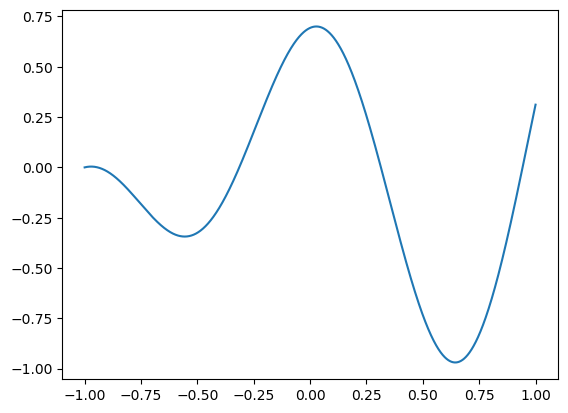

In [23]:
g(x) = f1(x)
# g(x) = x^2
N = 5

xs = [i for i in -1:0.001:1]
xss = [g(x) for x in xs]
plot(xs, xss)
show()

In [24]:
println([I(1, x-> x^2, i) for i in -1:0.1:1])

[1.103553390593274, 1.0681980515339466, 1.0328427124746193, 0.9974873734152919, 0.9621320343559644, 0.9267766952966372, 0.8914213562373097, 0.8560660171779823, 0.820710678118655, 0.7853553390593275, 0.7500000000000001, 0.7146446609406727, 0.6792893218813454, 0.643933982822018, 0.6085786437626906, 0.5732233047033632, 0.5378679656440357, 0.5025126265847084, 0.467157287525381, 0.4318019484660536, 0.3964466094067262]


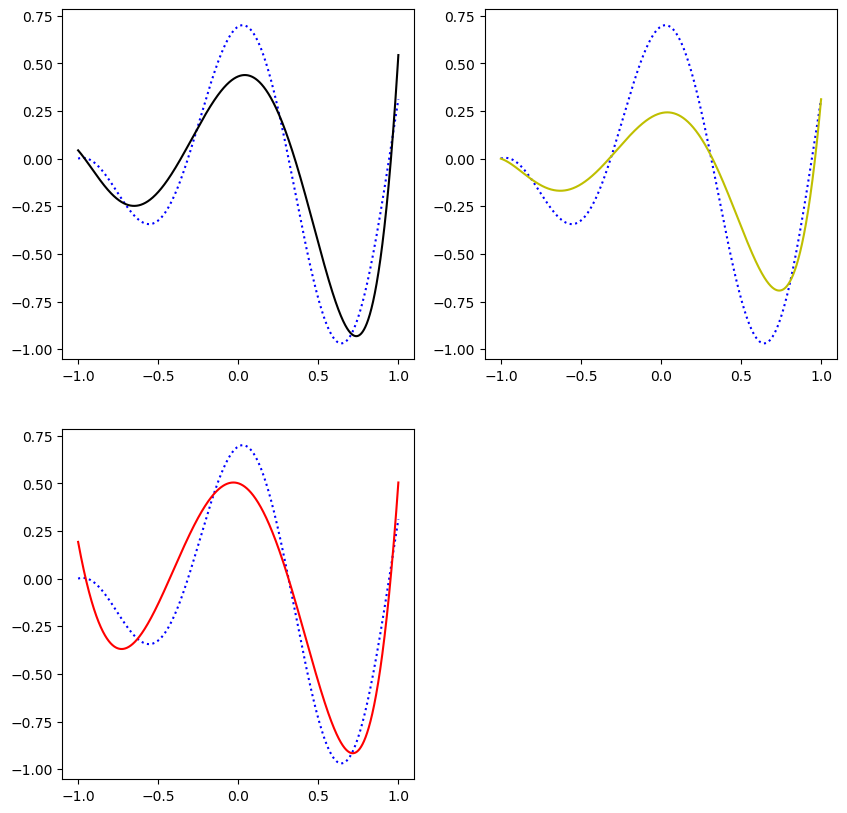

In [25]:
xss_I = [I(N, g, x) for x in xs]
xss_J = [J(N, g, x) for x in xs]
xss_K = [K(N, g, x) for x in xs]

figure1=figure("Position", [10, 10])

subplot(2,2,1)
plot(xs, xss, "b:", xs, xss_I, "k-")

subplot(222)
plot(xs, xss, "b:", xs, xss_J, "y-")

subplot(223)
plot(xs, xss, "b:", xs, xss_K, "r-")
show()

In [26]:
@printf("%.64f\n", maximum([abs(xss[i]-xss_I[i]) for i in 1:length(xss)]))
@printf("%.64f\n", maximum([abs(xss[i]-xss_J[i]) for i in 1:length(xss)]))
@printf("%.64f\n", maximum([abs(xss[i]-xss_K[i]) for i in 1:length(xss)]))

0.2921445638001414768503138930100249126553535461425781250000000000
0.4578847992444965431246828302391804754734039306640625000000000000
0.2492979834127009297617405536584556102752685546875000000000000000


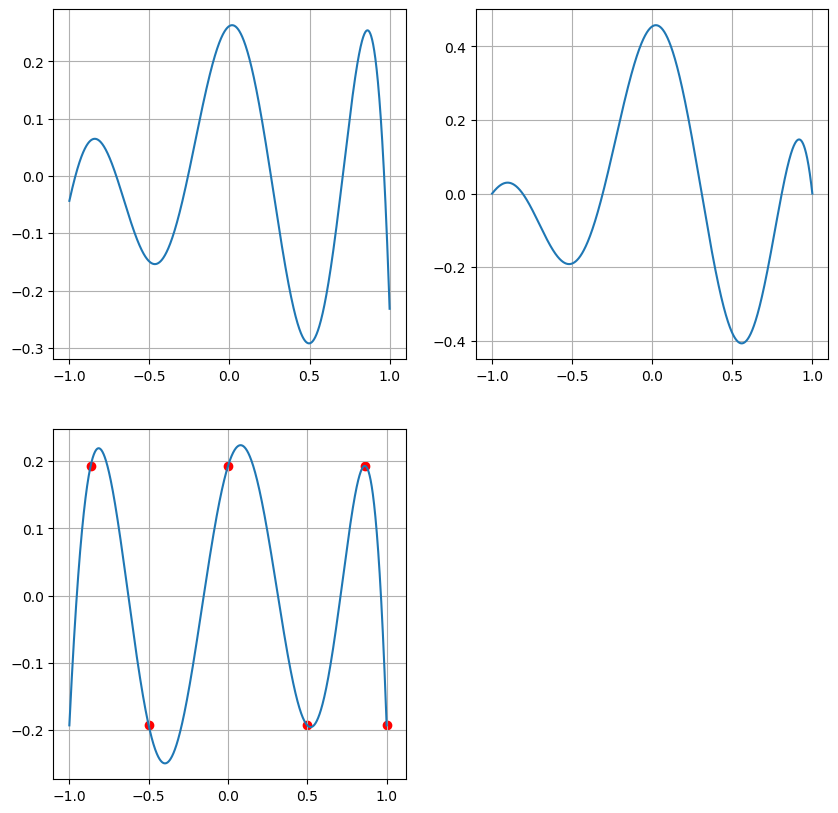

In [27]:
en_I = error(xss, xss_I)
en_J = error(xss, xss_J)
en_K = error(xss, xss_K)
u_n = [get_u(N, k) for k in 0:N]
fu = [- K(N, g, x) + g(x) for x in u_n]

figure1=figure("Position", [10, 10])

subplot(221)
plot(xs, en_I)
grid(true)

subplot(222)
plot(xs, en_J)
grid(true)

subplot(223)
plot(xs, en_K)
scatter(u_n, fu, color="red")
grid(true)
show()

In [28]:
#algorytm remeza
h(x::BigFloat) = BigFloat(g(Float64(x)))
polynomian, _D, max_error, alternans = ratfn_minimax(h, (-1,1), N, 0);

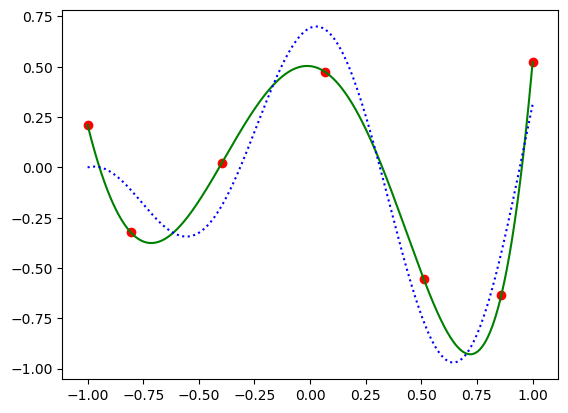

PyObject <matplotlib.collections.PathCollection object at 0x7f3494d850d0>

In [29]:
alterx = [Float64(e[1]) for e in alternans]
altery = [Float64(e[2] + h(e[1])) for e in alternans]
# ys = [i for i in -1:0.001:1]
yss = [w_opt(polynomian, x) for x in xs]
plot(xs, yss, "g-", xs, xss, "b:")
scatter(alterx, altery, color="red")

In [30]:
@printf("%16.64f\n%16.64f\n%16.64f\n%16.64f", max_error, maximum(en_I), maximum(en_J), maximum(en_K))

0.2110057626436592155392843221703804260904902885831465667890249108
0.2629656207771984832710643331665778532624244689941406250000000000
0.4578847992444965431246828302391804754734039306640625000000000000
0.2237761097876690419283818300755228847265243530273437500000000000

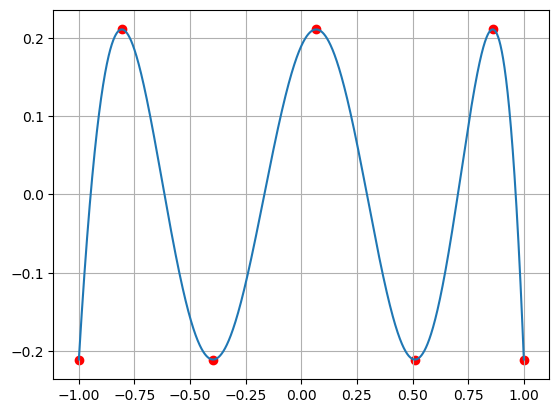

In [31]:
en_opt = error(xss, yss)
plot(xs, en_opt)
scatter(alterx, [Float64(-e[2]) for e in alternans], color="red")
grid(true)
show()

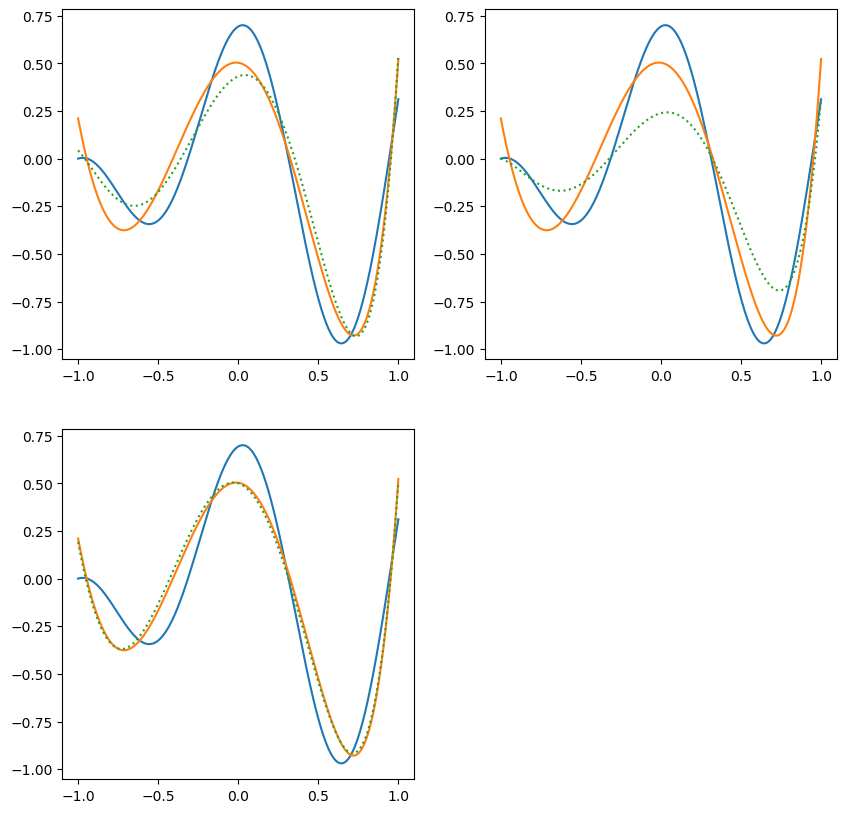

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f34921d4210>
 PyObject <matplotlib.lines.Line2D object at 0x7f34921322d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f3492132490>

In [32]:
#porównanie wielominaów I, J, K z wielomianem optymalnym

figure1=figure("Position", [10, 10])

subplot(221)
plot(xs, xss, xs, yss, xs, xss_I, ":")

subplot(222)
plot(xs, xss, xs, yss, xs, xss_J, ":")

subplot(223)
plot(xs, xss, xs, yss, xs, xss_K, ":")
show()

# Inna funkcja

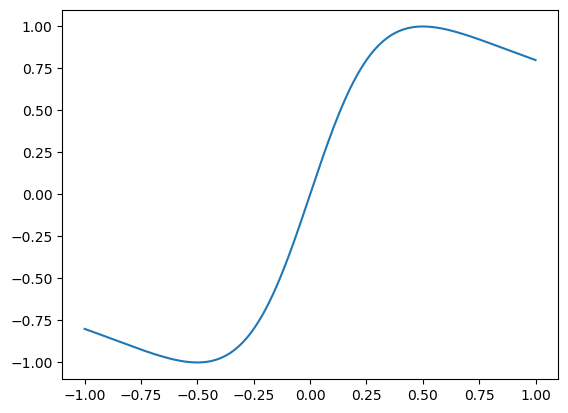

In [49]:
g(x) = f5(x)
N = 5
xs = [i for i in -1:0.001:1]
xss = [g(x) for x in xs]
plot(xs, xss)
show()

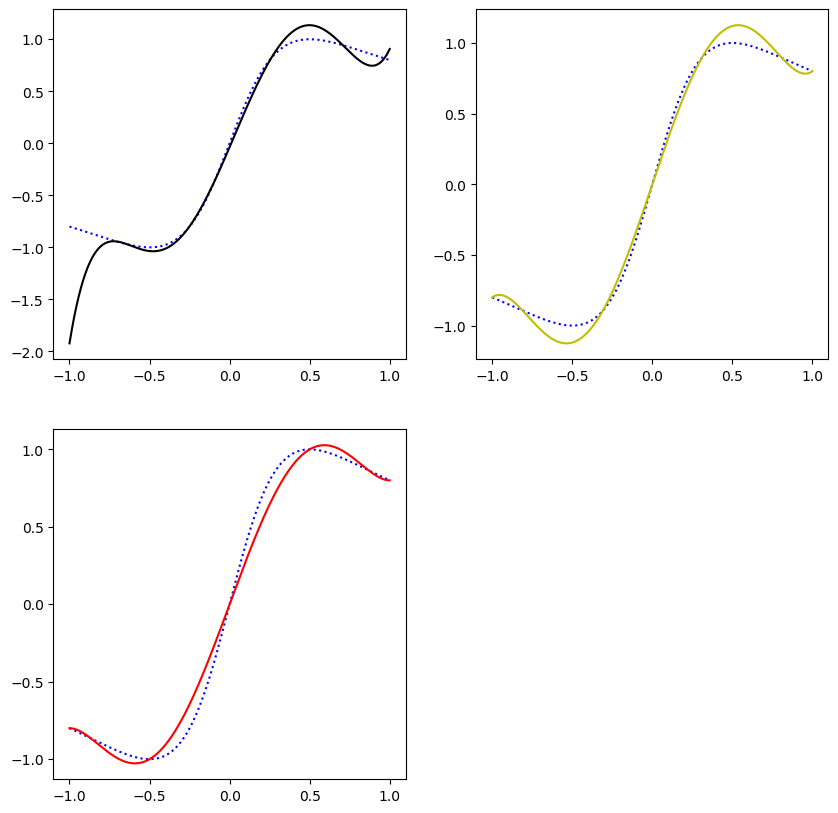

In [50]:
xss_I = [I(N, g, x) for x in xs]
xss_J = [J(N, g, x) for x in xs]
xss_K = [K(N, g, x) for x in xs]

figure1=figure("Position", [10, 10])

subplot(2,2,1)
plot(xs, xss, "b:", xs, xss_I, "k-")

subplot(222)
plot(xs, xss, "b:", xs, xss_J, "y-")

subplot(223)
plot(xs, xss, "b:", xs, xss_K, "r-")
show()

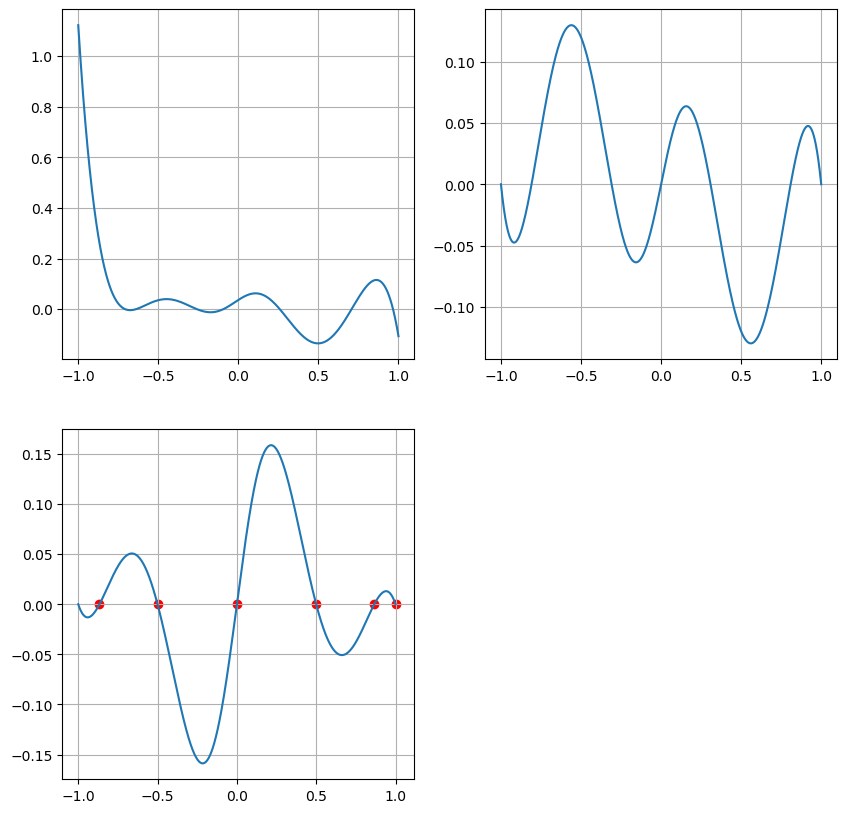

In [51]:
en_I = error(xss, xss_I)
en_J = error(xss, xss_J)
en_K = error(xss, xss_K)
u_n = [get_u(N, k) for k in 0:N]
fu = [- K(N, g, x) + g(x) for x in u_n]

figure1=figure("Position", [10, 10])

subplot(221)
plot(xs, en_I)
grid(true)

subplot(222)
plot(xs, en_J)
grid(true)

subplot(223)
plot(xs, en_K)
scatter(u_n, fu, color="red")
grid(true)
show()

In [36]:
#algorytm remeza
h(x::BigFloat) = BigFloat(g(Float64(x)))
polynomian, _D, max_error, alternans = ratfn_minimax(h, (-1,1), N, 0);

In [37]:
alterx = [Float64(e[1]) for e in alternans]
altery = [Float64(e[2] + h(e[1])) for e in alternans]
# ys = [i for i in -1:0.001:1]
yss = [w_opt(polynomian, x) for x in xs]
plot(ys, yss, "g-", xs, xss, "b:")
scatter(alterx, altery, color="red")

UndefVarError: UndefVarError: ys not defined

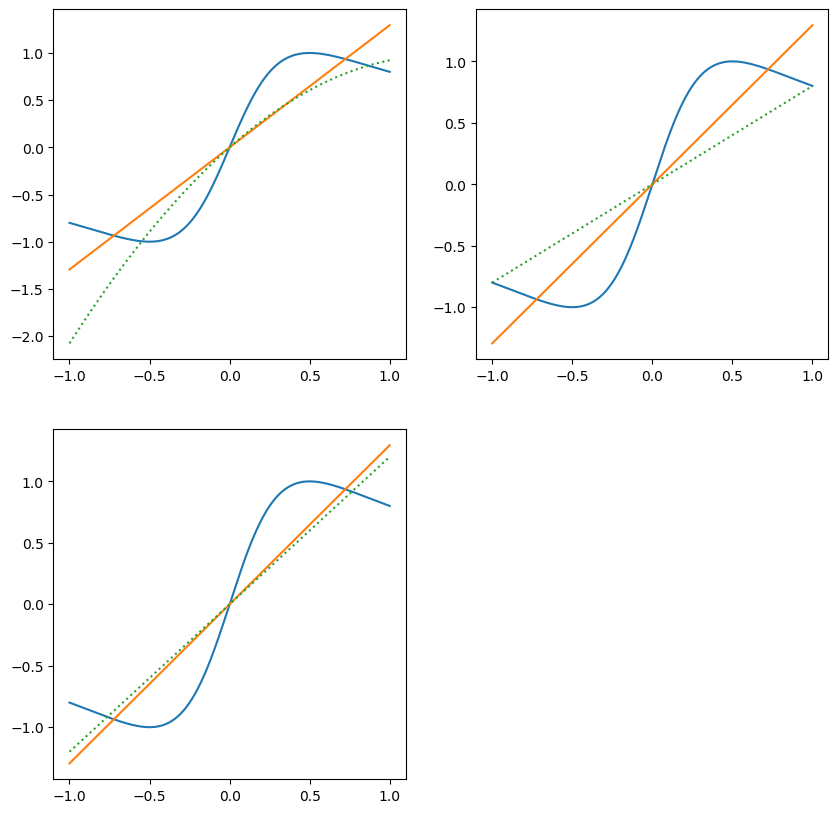

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3494759790>
 PyObject <matplotlib.lines.Line2D object at 0x7f34946ba810>
 PyObject <matplotlib.lines.Line2D object at 0x7f34946ba9d0>

In [21]:
#porównanie wielominaów I, J, K z wielomianem optymalnym

figure1=figure("Position", [10, 10])

subplot(221)
plot(xs, xss, xs, yss, xs, xss_I, ":")

subplot(222)
plot(xs, xss, xs, yss, xs, xss_J, ":")

subplot(223)
plot(xs, xss, xs, yss, xs, xss_K, ":")

In [22]:
@printf("%16.64f\n%16.64f\n%16.64f\n%16.64f", max_error, maximum(en_I), maximum(en_J), maximum(en_K))

0.4944271909999159721471520407818017747090454927353651440458860455
1.2773502691896261307391569062019698321819305419921875000000000000
0.6604439387601436228791840221674647182226181030273437500000000000
0.5240657412277091031782561003637965768575668334960937500000000000